In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor

# Load your data
df = pd.read_csv("/home/satyukt/Desktop/tasker/data/train_1.csv")

# Drop the 'Year' column since you don't want to include it in the model
X = df.drop(columns=["Year", "Yield (Tonnes/Hectare)"])
y = df["Yield (Tonnes/Hectare)"]

# Split into numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Preprocessing pipeline
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", oh_transformer, cat_features)
    ]
)

# Transform the features
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "XGBRFRegressor": XGBRFRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# Evaluation function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Training performance
    y_train_pred = model.predict(X_train)
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    
    # Testing performance
    y_test_pred = model.predict(X_test)
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)
    
    print(f"Model: {model_name}")
    print(f"Training - MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
    print(f"Testing  - MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")
    print("====================================")



Model: Linear Regression
Training - MAE: 0.3704, RMSE: 0.4282, R2: 0.3664
Testing  - MAE: 0.4169, RMSE: 0.4453, R2: -0.1697
Model: Lasso
Training - MAE: 0.4049, RMSE: 0.5379, R2: 0.0000
Testing  - MAE: 0.3375, RMSE: 0.4313, R2: -0.0969
Model: Ridge
Training - MAE: 0.3756, RMSE: 0.4579, R2: 0.2754
Testing  - MAE: 0.4024, RMSE: 0.4415, R2: -0.1497
Model: KNeighborsRegressor
Training - MAE: 0.3348, RMSE: 0.4493, R2: 0.3023
Testing  - MAE: 0.3477, RMSE: 0.4080, R2: 0.0181
Model: DecisionTreeRegressor
Training - MAE: 0.0000, RMSE: 0.0000, R2: 1.0000
Testing  - MAE: 0.4031, RMSE: 0.5186, R2: -0.5862
Model: XGBRFRegressor
Training - MAE: 0.0958, RMSE: 0.1142, R2: 0.9550
Testing  - MAE: 0.3477, RMSE: 0.3903, R2: 0.1014
Model: CatBoostRegressor
Training - MAE: 0.0030, RMSE: 0.0038, R2: 1.0000
Testing  - MAE: 0.3602, RMSE: 0.3991, R2: 0.0605
Model: AdaBoostRegressor
Training - MAE: 0.1077, RMSE: 0.1389, R2: 0.9334
Testing  - MAE: 0.3617, RMSE: 0.4043, R2: 0.0358


In [11]:
model_list, r2_list

NameError: name 'model_list' is not defined

In [13]:
new = df.drop('Year', axis=1)

In [16]:
new

,Season,total_Rainfall,Wind Speed,Temperature (°C),NDVI,LST,rsm,Relative Humidity,Yield (Tonnes/Hectare)
0,Kharif,386.0,3.597843,22.319869,0.228613,33.133940,0.375640,94.678497,3.145154
1,Rabi,298.0,1.916522,21.764293,0.313396,36.131505,0.375640,97.630815,2.131488
2,Kharif,482.0,3.500850,22.065163,0.279665,33.133940,0.375640,95.881373,2.891524
3,Rabi,182.0,1.947377,21.833989,0.422297,32.133325,0.375640,97.462951,2.133333
4,Kharif,462.0,3.695098,22.253268,0.166549,33.133940,0.375640,95.042745,3.062620
5,Rabi,239.0,2.069180,21.681858,0.424321,36.311319,0.375640,98.094208,1.894737
6,Kharif,432.0,3.545621,22.611830,0.243651,33.133940,0.375640,93.552353,2.895687
7,Rabi,323.0,1.972568,22.125792,0.335538,38.313806,0.375640,96.130929,2.088000
8,Kharif,293.0,3.483399,23.200261,0.286644,23.974381,0.375640,91.369739,3.215773
9,Rabi,219.0,1.986087,22.137880,0.335535,37.167438,0.375640,96.069620,2.964206


In [15]:
def zero_one(x):
    if x == "Kharif":
        return 1
    else:
        return 0

In [17]:
new['Season'] = new['Season'].apply(lambda x: zero_one(x))
new

,Season,total_Rainfall,Wind Speed,Temperature (°C),NDVI,LST,rsm,Relative Humidity,Yield (Tonnes/Hectare)
0,1,386.0,3.597843,22.319869,0.228613,33.133940,0.375640,94.678497,3.145154
1,0,298.0,1.916522,21.764293,0.313396,36.131505,0.375640,97.630815,2.131488
2,1,482.0,3.500850,22.065163,0.279665,33.133940,0.375640,95.881373,2.891524
3,0,182.0,1.947377,21.833989,0.422297,32.133325,0.375640,97.462951,2.133333
4,1,462.0,3.695098,22.253268,0.166549,33.133940,0.375640,95.042745,3.062620
5,0,239.0,2.069180,21.681858,0.424321,36.311319,0.375640,98.094208,1.894737
6,1,432.0,3.545621,22.611830,0.243651,33.133940,0.375640,93.552353,2.895687
7,0,323.0,1.972568,22.125792,0.335538,38.313806,0.375640,96.130929,2.088000
8,1,293.0,3.483399,23.200261,0.286644,23.974381,0.375640,91.369739,3.215773
9,0,219.0,1.986087,22.137880,0.335535,37.167438,0.375640,96.069620,2.964206


In [19]:
for_heat = new.corr()

<AxesSubplot:>

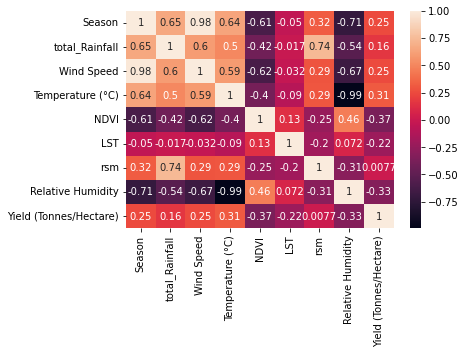

In [21]:
sns.heatmap(for_heat, annot=True)